In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import  neighbors
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
trainday = pd.read_excel(r"G:\traindata\yddata\6-7month.xlsx")#读取展示数据

In [4]:
trainday  = pd.DataFrame(trainday)
X = trainday.iloc[:,trainday.columns == 'SALEDATE']
# X = X.iloc[:,0].apply(pd.to_datetime).map(dt.datetime.toordinal)      #将时间转换为格林威治时间
X = X.values.reshape(-1, 1)

In [5]:
y = trainday.iloc[:,trainday.columns == 'MONEY']
y = y.values.reshape(-1, 1)  #转为一维矩阵

In [6]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state =20)  #数据拆分
knn = neighbors.KNeighborsRegressor(5,weights = 'uniform')                        #取最近的七个点求平均
knn.fit(Xtrain,Ytrain)                                                            #训练模型
j = knn.score(Xtest,Ytest)                                                        #模型打分
j
y_hat = knn.predict(X)

In [7]:
import numpy as np
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
    pint(np.mean(diff / true))
MAPE(y,y_hat)

0.24279594407019117

In [8]:
maxlist = []
for j in range(1,30):
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state =20)  #数据拆分
    knn1 = neighbors.KNeighborsRegressor(j,weights = 'uniform')                        #最近的两个点求平均
    knn1.fit(Xtrain,Ytrain)                                                            #训练模型
    j = knn1.score(Xtest,Ytest)   #模型打分
    y_hat=  knn1.predict(X)
    x = mean_absolute_error(y,y_hat)
    z = MAPE(y,y_hat)
    maxlist.append(z)
maxlist

[0.0735423834227847,
 0.2520459362053926,
 0.2593973432490453,
 0.25821522884876247,
 0.24279594407019117,
 0.25119189636131145,
 0.2545681261873879,
 0.2569386522976244,
 0.24890621536753482,
 0.25143956069411916,
 0.24851890784371708,
 0.24744143928558684,
 0.25382412501219925,
 0.24661312931656784,
 0.2527161925535417,
 0.2529241287688501,
 0.24851187714259104,
 0.24747832435540765,
 0.24817422217255158,
 0.24908149243386857,
 0.2473590040805055,
 0.24745215690243438,
 0.2484298512072205,
 0.24782255254138388,
 0.24830618172591618,
 0.24726831937724653,
 0.24842965550298174,
 0.24844566677554036,
 0.2506261087179878]

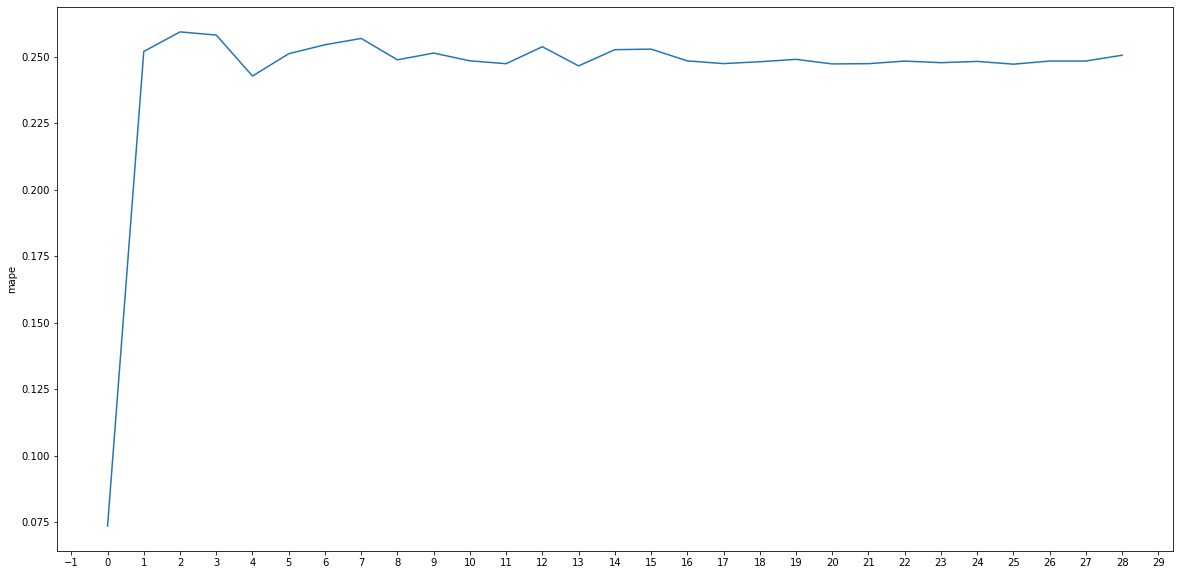

In [9]:
from matplotlib.pyplot import MultipleLocator
fig = plt.figure(figsize=(20, 10))
x_major_locator = MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator) 
plt.plot(maxlist)  # y轴变量
plt.ylabel('mape')  # y轴名字
plt.show()

In [10]:
knn = neighbors.KNeighborsRegressor(5,weights = 'uniform')
knn.fit(X,y)
y_hat = knn.predict(X)

<function matplotlib.pyplot.show(*args, **kw)>

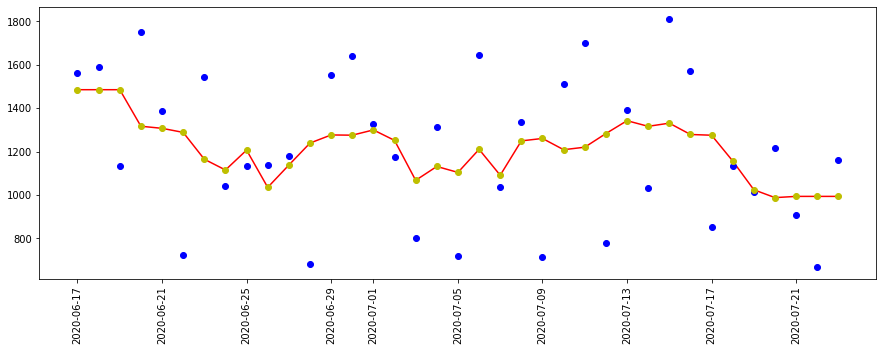

In [11]:
fig = plt.figure(figsize=(15, 5))#展示
ax = fig.add_subplot(111)
ax.plot(X,y_hat,'r-')
ax.plot(X,y,'bo')
ax.plot(X,y_hat,'yo')
plt.xticks(rotation=90)
plt.show

In [12]:
import numpy as np
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
    pint(np.mean(diff / true))
MAPE(y,y_hat)

0.2377601707696379